In [ ]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# default_exp perturb

# Perturb

> Functions for perturbing a graph 

## Edge deletions

In [ ]:
#export 
from nbdev.showdoc import *
import networkx as nx
from grapht.graphtools import non_pendant_edges
from grapht.sampling import khop_subgraph, sample_edges

In [ ]:
#export 
def khop_edge_deletion(G, k, r):
    """
    Removes r edges which are in a k-hop neighbourhood of some node, the graph will remain connected
    """
    solution = None
    while solution is None:
        subgraph = khop_subgraph(G, k)
        if len(non_pendant_edges(subgraph)) < r:
            continue
        edges = sample_edges(subgraph, r, non_pendant=True)
        Gp = G.copy()
        Gp.remove_edges_from(edges)
        if nx.is_connected(Gp):
            solution = Gp
    return solution

The below example shows how the edges are localised using different values of $k$

In [ ]:
#hide
import warnings
import matplotlib as mpl
warnings.filterwarnings("ignore", category=mpl.cbook.MatplotlibDeprecationWarning)

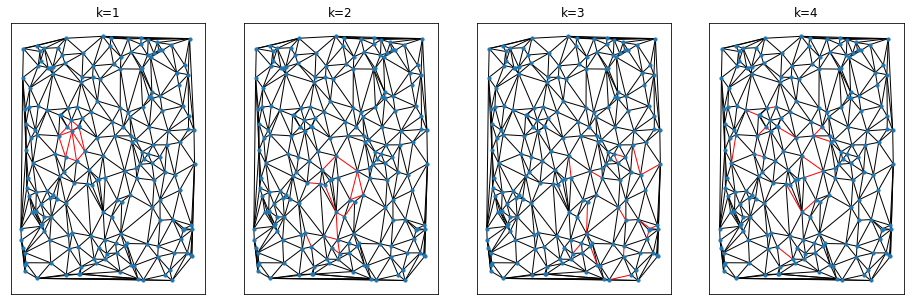

In [ ]:
import matplotlib.pyplot as plt
from grapht.data import make_planar_graph
from grapht.plotting import highlight_edges

fig, axs = plt.subplots(1, 4, figsize=(16, 5))
G, pos = make_planar_graph(200)

for k in [1, 2, 3, 4]:    
    Gp = khop_edge_deletion(G, k, 15)
    edges_removed = set(G.edges()) - set(Gp.edges())
    highlight_edges(G, edges_removed, axs[k-1], pos)
    axs[k-1].set(title=f'k={k}', xticks=[], yticks=[])
plt.show()

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_graphtools.ipynb.
Converted 01_sampling.ipynb.
Converted 02_spectral.ipynb.
Converted 03_perturb.ipynb.
Converted 04_plotting.ipynb.
Converted 05_data.ipynb.
Converted index.ipynb.
